# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import os
import datetime
import ast
import matplotlib.pyplot as plt

# Question 1


In [2]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep="|")

In [3]:
iUsers = users.set_index(['occupation', 'gender'])
print(users.head(), end="\n\n")
print(iUsers.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

                   user_id  age zip_code
occupation gender                       
technician M             1   24    85711
other      F             2   53    94043
writer     M             3   23    32067
technician M             4   24    43537
other      F             5   33    15213


In [4]:
# Step 4
occupations = users['occupation'].unique()
# print(*occupations)
print("Mean Ages for different occupation")
for occ in occupations:
    print(occ, ":", "{:.2f} Years".format(iUsers.loc[occ].age.mean()))

Mean Ages for different occupation
technician : 33.15 Years
other : 34.52 Years
writer : 36.31 Years
executive : 38.72 Years
administrator : 38.75 Years
student : 22.08 Years
lawyer : 36.75 Years
educator : 42.01 Years
scientist : 35.55 Years
entertainment : 29.22 Years
programmer : 33.12 Years
librarian : 40.00 Years
homemaker : 32.57 Years
artist : 31.39 Years
engineer : 36.39 Years
marketing : 37.62 Years
none : 26.56 Years
healthcare : 41.56 Years
retired : 63.07 Years
salesman : 35.67 Years
doctor : 43.57 Years


In [5]:
# Step 5
mal = []
for occ in occupations:
    rat = iUsers.loc[occ, 'M'].size/iUsers.loc[occ].size
    mal.append([occ, rat])
mal = sorted(mal, key=lambda _: _[1], reverse=True)

print("below is the list of male ratio in profession that is sorted.")
for x,y in mal:
    print('ratio in', x, "=", y)

below is the list of male ratio in profession that is sorted.
ratio in doctor = 1.0
ratio in engineer = 0.9701492537313433
ratio in technician = 0.9629629629629629
ratio in retired = 0.9285714285714286
ratio in programmer = 0.9090909090909091
ratio in executive = 0.90625
ratio in scientist = 0.9032258064516129
ratio in entertainment = 0.8888888888888888
ratio in lawyer = 0.8333333333333334
ratio in salesman = 0.75
ratio in educator = 0.7263157894736842
ratio in student = 0.6938775510204082
ratio in other = 0.6571428571428571
ratio in marketing = 0.6153846153846154
ratio in writer = 0.5777777777777777
ratio in none = 0.5555555555555556
ratio in administrator = 0.5443037974683544
ratio in artist = 0.5357142857142857
ratio in librarian = 0.43137254901960786
ratio in healthcare = 0.3125
ratio in homemaker = 0.14285714285714285


C:\Users\Rishabh\AppData\Local\Temp/ipykernel_3752/500158249.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  rat = iUsers.loc[occ, 'M'].size/iUsers.loc[occ].size


In [6]:
# Step 6
ages = []
for occ in occupations:
    age = iUsers.loc[occ].age
    ages.append([occ, age.min(), age.max()])
    print('Profession: {}, Min Age: {}, Max Age: {}'.format(ages[-1][0], ages[-1][1], ages[-1][2]))


Profession: technician, Min Age: 21, Max Age: 55
Profession: other, Min Age: 13, Max Age: 64
Profession: writer, Min Age: 18, Max Age: 60
Profession: executive, Min Age: 22, Max Age: 69
Profession: administrator, Min Age: 21, Max Age: 70
Profession: student, Min Age: 7, Max Age: 42
Profession: lawyer, Min Age: 21, Max Age: 53
Profession: educator, Min Age: 23, Max Age: 63
Profession: scientist, Min Age: 23, Max Age: 55
Profession: entertainment, Min Age: 15, Max Age: 50
Profession: programmer, Min Age: 20, Max Age: 63
Profession: librarian, Min Age: 23, Max Age: 69
Profession: homemaker, Min Age: 20, Max Age: 50
Profession: artist, Min Age: 19, Max Age: 48
Profession: engineer, Min Age: 22, Max Age: 70
Profession: marketing, Min Age: 24, Max Age: 55
Profession: none, Min Age: 11, Max Age: 55
Profession: healthcare, Min Age: 22, Max Age: 62
Profession: retired, Min Age: 51, Max Age: 73
Profession: salesman, Min Age: 18, Max Age: 66
Profession: doctor, Min Age: 28, Max Age: 64


In [7]:
# Step 7
ages = []
for occ in occupations:
    try:
        ageM = iUsers.loc[occ, 'M'].age.mean()
        ageF = iUsers.loc[occ, 'F'].age.mean()
        ages.append([occ, ageM, ageF])
        print('Profession: {}\n\tMale Mean: {:.2f}\n\tFemale Mean: {:.2f}'.format(ages[-1][0].upper(), ages[-1][1], ages[-1][2]))
    except:
        ageM = iUsers.loc[occ, 'M'].age.mean()
        ageF = 0
        ages.append([occ, ageM, ageF])
        print('Profession: {}\n\tMale Mean: {:.2f}\n\tFemale Mean: {:.2f}'.format(ages[-1][0].upper(), ages[-1][1], ages[-1][2]))
        

Profession: TECHNICIAN
	Male Mean: 32.96
	Female Mean: 38.00
Profession: OTHER
	Male Mean: 34.03
	Female Mean: 35.47
Profession: WRITER
	Male Mean: 35.35
	Female Mean: 37.63
Profession: EXECUTIVE
	Male Mean: 38.17
	Female Mean: 44.00
Profession: ADMINISTRATOR
	Male Mean: 37.16
	Female Mean: 40.64
Profession: STUDENT
	Male Mean: 22.67
	Female Mean: 20.75
Profession: LAWYER
	Male Mean: 36.20
	Female Mean: 39.50
Profession: EDUCATOR
	Male Mean: 43.10
	Female Mean: 39.12
Profession: SCIENTIST
	Male Mean: 36.32
	Female Mean: 28.33
Profession: ENTERTAINMENT
	Male Mean: 29.00
	Female Mean: 31.00
Profession: PROGRAMMER
	Male Mean: 33.22
	Female Mean: 32.17
Profession: LIBRARIAN
	Male Mean: 40.00
	Female Mean: 40.00
Profession: HOMEMAKER
	Male Mean: 23.00
	Female Mean: 34.17
Profession: ARTIST
	Male Mean: 32.33
	Female Mean: 30.31
Profession: ENGINEER
	Male Mean: 36.60
	Female Mean: 29.50
Profession: MARKETING
	Male Mean: 37.88
	Female Mean: 37.20
Profession: NONE
	Male Mean: 18.60
	Female Mean

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_3752/3531144477.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  ageM = iUsers.loc[occ, 'M'].age.mean()
C:\Users\Rishabh\AppData\Local\Temp/ipykernel_3752/3531144477.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  ageF = iUsers.loc[occ, 'F'].age.mean()
C:\Users\Rishabh\AppData\Local\Temp/ipykernel_3752/3531144477.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  ageM = iUsers.loc[occ, 'M'].age.mean()


In [8]:
# Step 8
mal = []
for occ in occupations:
    rat = iUsers.loc[occ, 'M'].size/iUsers.loc[occ].size
    mal.append([occ, rat])

for x,y in mal:
    print('Profession: {}\n\tMale %: {:.2f}\n\tFemale %: {:.2f}'.format(x.upper(), y*100, (1-y)*100))


Profession: TECHNICIAN
	Male %: 96.30
	Female %: 3.70
Profession: OTHER
	Male %: 65.71
	Female %: 34.29
Profession: WRITER
	Male %: 57.78
	Female %: 42.22
Profession: EXECUTIVE
	Male %: 90.62
	Female %: 9.38
Profession: ADMINISTRATOR
	Male %: 54.43
	Female %: 45.57
Profession: STUDENT
	Male %: 69.39
	Female %: 30.61
Profession: LAWYER
	Male %: 83.33
	Female %: 16.67
Profession: EDUCATOR
	Male %: 72.63
	Female %: 27.37
Profession: SCIENTIST
	Male %: 90.32
	Female %: 9.68
Profession: ENTERTAINMENT
	Male %: 88.89
	Female %: 11.11
Profession: PROGRAMMER
	Male %: 90.91
	Female %: 9.09
Profession: LIBRARIAN
	Male %: 43.14
	Female %: 56.86
Profession: HOMEMAKER
	Male %: 14.29
	Female %: 85.71
Profession: ARTIST
	Male %: 53.57
	Female %: 46.43
Profession: ENGINEER
	Male %: 97.01
	Female %: 2.99
Profession: MARKETING
	Male %: 61.54
	Female %: 38.46
Profession: NONE
	Male %: 55.56
	Female %: 44.44
Profession: HEALTHCARE
	Male %: 31.25
	Female %: 68.75
Profession: RETIRED
	Male %: 92.86
	Female %

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_3752/2243029201.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  rat = iUsers.loc[occ, 'M'].size/iUsers.loc[occ].size


# Question 2

In [9]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [10]:
# Step 4
print("Goals", *euro12['Goals'], sep="\n")

Goals
4
4
4
5
3
10
5
6
2
2
6
1
5
12
5
2


In [11]:
# Step 5
print("No. of Partcipating Teams:",euro12['Team'].unique().size)

No. of Partcipating Teams: 16


In [12]:
# Step 6
print("No. of Columns:", euro12.shape[1])

No. of Columns: 35


In [13]:
# Step 7
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
# Step 8
discipline.sort_values(["Red Cards", "Yellow Cards"], inplace=True, ascending=False)
discipline

C:\Users\Rishabh\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [15]:
# Step 9
print("Yellow cards mean:", euro12["Yellow Cards"].mean())

Yellow cards mean: 7.4375


In [16]:
# Step 10
# print(euro12[["Team", "Goals"]])
goals_mt_6 = euro12[euro12["Goals"]>6][["Team", "Goals"]]
goals_mt_6

,Team,Goals
5,Germany,10
13,Spain,12


In [17]:
# Step 11
gCountries = euro12[euro12["Team"].str.contains("^G")]
gCountries

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [18]:
# Step 12
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
# Step 13
euro12.iloc[:-3, :]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [20]:
# Step 14
countries = ["England" ,"Italy", "Russia"]
euro12[euro12["Team"].isin(countries)][["Shooting Accuracy"]]

,Shooting Accuracy
3,50.0%
7,43.0%
12,22.5%


# Question 3

In [21]:
# Step 1
first = [random.randrange(1,5,1) for i in range(100)]
second = [random.randrange(1,4,1) for i in range(100)]
third = [random.randrange(10000,30001,1) for i in range(100)]

In [22]:
# Step 3
df = pd.DataFrame(list(zip(first, second, third)))

In [23]:
# Step 4
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]
df

,bedrs,bathrs,price_sqr_meter
0,4,2,22459
1,2,2,20591
2,1,3,11235
3,1,2,20671
4,2,3,17183
...,...,...,...
95,2,1,13079
96,4,3,18464
97,2,1,22340
98,4,2,10088


In [24]:
#Step 5
bigcolumn = pd.DataFrame(first)
bigcolumn = bigcolumn.append(second)
bigcolumn = bigcolumn.append(third)

print(bigcolumn)

# Step 6 : YES IT IS TRUE

        0
0       4
1       2
2       1
3       1
4       2
..    ...
95  13079
96  18464
97  22340
98  10088
99  14719

[300 rows x 1 columns]


In [25]:
bigcolumn.reset_index(drop=True, inplace=True)
print(bigcolumn)

         0
0        4
1        2
2        1
3        1
4        2
..     ...
295  13079
296  18464
297  22340
298  10088
299  14719

[300 rows x 1 columns]


# Question 4

In [26]:
# Step 2
file1 = open("wind.txt", "r")
file2 = open("temp_wind", "w+")
data_mod = file1.read().replace("   ", " ")
data_mod = data_mod.replace("  ", " ")
file2.write(data_mod)
file2.close()
file1.close()

wind = pd.read_csv("temp_wind", sep=" ")
os.remove("temp_wind")

In [27]:
wind.describe()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6574.000000,6574.000000,6574.000000,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,69.500304,6.523274,15.728628,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.188131,3.448871,8.800335,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,61.000000,1.000000,1.000000,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,65.000000,4.000000,8.000000,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,69.500000,7.000000,16.000000,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,74.000000,10.000000,23.000000,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,78.000000,12.000000,31.000000,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [28]:
# Step 3
data = wind.drop(["Yr", "Mo", "Dy"], axis=1)
dates = pd.to_datetime(wind["Yr"].astype(str)+"-"+wind["Mo"].astype(str)+"-"+wind["Dy"].astype(str))
type(dates)
data["Date"] = dates
data.set_index("Date")

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [29]:
# Step 4

data.reset_index(drop=True)
# data["Date"] = data["Date"].map(lambda x: print(x.year)).unique()
# data["Date"].map(lambda x: datetime.date(x.year -100, x.month, x.day) if x > datetime.now() else x)
data["Date"] = data["Date"].map(lambda x: datetime.date(x.year -100, x.month, x.day) if x > datetime.date.today() else x)
# data.info()

# Step 5
data = data.set_index("Date")
data

C:\Users\Rishabh\AppData\Local\Temp/ipykernel_3752/727847261.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  data["Date"] = data["Date"].map(lambda x: datetime.date(x.year -100, x.month, x.day) if x > datetime.date.today() else x)


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [30]:
# Step 6
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [31]:
# Step 7
data.isnull().sum().sum()

31

In [32]:
# Step 8
data.describe().loc["mean"].mean()

10.227982360836924

In [33]:
# Step 9
loc_stats = data.describe().loc[["min", "max", "mean", "std"]]
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [34]:
# Step 10
max_ = data.aggregate(max ,axis=1)
min_ = data.aggregate(min ,axis=1)
mean_ = data.aggregate(max ,axis=1)

day_stats = pd.DataFrame()
day_stats["max"] = max_
day_stats["min"] = min_
day_stats["mean"] = mean_

day_stats

,max,min,mean
Date,,,
1961-01-01,18.50,9.29,18.50
1961-01-02,17.54,6.50,17.54
1961-01-03,18.50,6.17,18.50
1961-01-04,11.75,1.79,11.75
1961-01-05,13.33,6.17,13.33
...,...,...,...
1978-12-27,40.08,8.08,40.08
1978-12-28,41.46,5.00,41.46
1978-12-29,29.58,8.71,29.58


In [35]:
# Step 11
data = data.reset_index()
months = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}
data["Month"] = data["Date"].apply(lambda x: months[x.month])
data = data.set_index("Month")
print("Avg Speed at each location in January")
data.loc["Jan"].describe().loc["mean"]

Avg Speed at each location in January


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
Name: mean, dtype: float64

In [36]:
# Step 12
data = data.reset_index(drop=True)
data["Year"] = data["Date"].apply(lambda x: str(x.year))
years = list(data["Year"].unique())
data = data.set_index("Year")


yearly = pd.DataFrame()

for year in years:
    yearly = yearly.append(data.loc[year].describe().loc[["mean"]])
yearly.index = years
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


In [37]:
# Step 13
data = data.reset_index(drop=True)
data["Month"] = data["Date"].apply(lambda x: str(x.month))
months = list(data["Month"].unique())
data = data.set_index("Month")
monthly = pd.DataFrame()

for month in months:
    monthly = monthly.append(data.loc[month].describe().loc[["mean"]])
monthly.index = months
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1,14.847325,12.914560,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.550520,18.028763
2,13.710906,12.111122,12.879132,6.942411,11.551772,7.633858,11.206024,9.341437,9.313169,9.518051,13.728898,17.156142
3,13.158687,11.505842,12.648118,7.265907,11.554516,7.959409,11.310179,9.635896,9.700324,10.096953,13.810609,16.909317
4,12.555648,10.429759,12.204815,6.898037,10.677667,7.441389,10.221315,8.909056,8.930870,9.158019,12.664759,14.937611
5,11.724032,10.145619,11.550394,6.307487,10.224301,6.942061,8.797738,8.452903,8.040806,8.524857,12.767258,13.736039
6,10.451317,8.949704,10.361315,5.652278,9.529926,6.410093,8.009556,7.920796,7.639796,7.729185,12.246407,12.861818
7,9.992007,8.357778,9.349642,5.416935,9.302634,5.972348,7.843501,7.262760,7.544480,7.321416,11.676505,12.800789
8,10.213411,8.415143,9.993441,5.270681,8.901559,5.891057,7.772312,6.842025,7.240573,7.002783,11.110090,12.565943
9,11.458519,9.981002,10.756883,5.615176,9.766315,6.566222,8.609722,7.745677,7.610556,7.689278,12.686389,14.761963
10,12.660610,11.010681,11.453943,6.065215,10.550251,7.159910,9.387778,8.726308,8.347181,8.850376,14.155323,16.697151


In [38]:
# Step 14
data = data.reset_index(drop=True)
data["Week"] = data["Date"].apply(lambda x: str(x.isocalendar().week))
weeks = list(data["Week"].unique())
data = data.set_index("Week")
weekly = pd.DataFrame()

for week in weeks:
    weekly = weekly.append(data.loc[week].describe().loc[["mean"]])
weekly.index = weeks
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
52,14.469134,11.692283,14.210000,7.018189,10.856905,7.379213,12.011969,9.121811,9.665197,9.677953,13.549055,19.183228
1,13.920000,11.710880,12.853016,6.617302,10.473175,7.578492,11.623651,9.123600,9.272222,9.870635,14.241746,18.249841
2,15.549921,13.359524,14.016349,7.307698,12.183810,8.170238,11.934365,9.502460,9.428095,9.798175,14.494603,17.623413
3,14.950159,13.281349,13.166825,7.060794,11.959200,8.320238,11.856905,9.696825,9.597619,10.169444,14.578254,17.981190
4,15.241920,13.575317,13.554524,7.698413,12.110079,8.235159,11.732857,9.854048,9.822302,10.352063,14.892222,18.337381
5,14.559127,12.853413,13.070794,7.400952,11.823730,8.165397,11.995714,9.682381,9.854286,10.196111,14.667381,17.702222
6,13.203730,11.508492,12.142619,6.469127,11.025476,7.166746,11.115317,8.894206,9.323413,9.298175,13.903254,17.921587
7,14.517460,12.681349,13.219524,7.148160,12.141032,7.906190,11.390238,9.749524,9.417778,9.605476,13.776667,17.130159
8,13.422857,11.822937,13.367381,7.142400,11.480635,7.729683,11.329048,9.329762,9.247063,9.541984,13.132302,16.882540
9,12.761360,11.837460,12.627440,6.620000,10.937143,7.457778,10.622778,9.387778,8.864160,9.611508,13.724048,16.602080


In [39]:
#Step 15
max_ = weekly.aggregate(max ,axis=1)
min_ = weekly.aggregate(min ,axis=1)
mean_ = weekly.aggregate(max ,axis=1)

weekly_stats = pd.DataFrame()
weekly_stats["max"] = max_
weekly_stats["min"] = min_
weekly_stats["mean"] = mean_

weekly_stats

,max,min,mean
52,19.183228,7.018189,19.183228
1,18.249841,6.617302,18.249841
2,17.623413,7.307698,17.623413
3,17.981190,7.060794,17.981190
4,18.337381,7.698413,18.337381
5,17.702222,7.400952,17.702222
6,17.921587,6.469127,17.921587
7,17.130159,7.148160,17.130159
8,16.882540,7.142400,16.882540
9,16.602080,6.620000,16.602080


# Question 5

In [40]:
# Step 1
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [41]:
# Step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [42]:
# Step 5
chipo.shape[0]

4622

In [43]:
# Step 6
chipo.shape[1]

5

In [44]:
# Step 7
print(*chipo.columns, sep="\n")

order_id
quantity
item_name
choice_description
item_price


In [45]:
# Step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

As seen above the chipo is indexed by default

In [46]:
# Step 9
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [47]:
# Step 10
chipo.item_name.unique().shape[0]

50

In [48]:
# Step 11
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [49]:
# Step 12
chipo.quantity.sum()

4972

In [50]:
# Step 13
def format_(x):
    x = x.replace("$", "")
    x = x.replace(" ", "")
    return float(x)
chipo.item_price = chipo.item_price.apply(format_)
print(chipo.item_price.describe())
change_int = lambda x: int(x)
chipo.item_price = chipo.item_price.apply(int)
print(chipo.item_price.describe())

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64
count    4622.000000
mean        6.934660
std         4.202828
min         1.000000
25%         3.000000
50%         8.000000
75%         9.000000
max        44.000000
Name: item_price, dtype: float64


In [51]:
# Step 14
chipo.item_price.sum()

32052

In [52]:
# Step 15
chipo.order_id.value_counts().count()

1834

In [53]:
# Step 16
chipo.item_price.mean()

6.934660320207702

In [54]:
# Step 17
chipo.item_name.value_counts().count()

50

# Question 6

In [55]:
US_MD_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
US_MD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                145 non-null    int64  
 1   Marriages           141 non-null    float64
 2   Divorces            141 non-null    float64
 3   Population          145 non-null    int64  
 4   Marriages_per_1000  141 non-null    float64
 5   Divorces_per_1000   141 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 6.9 KB


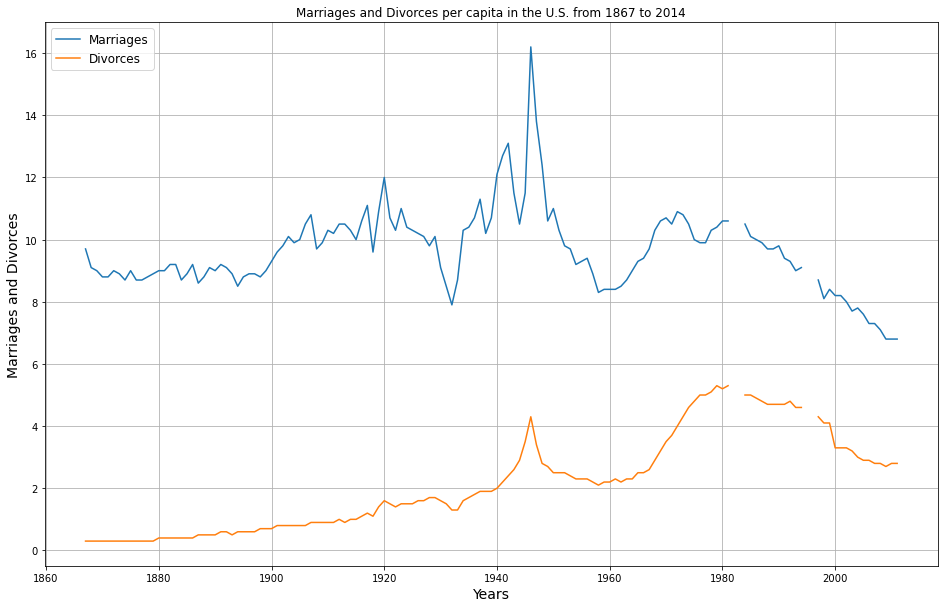

In [56]:
years = US_MD_data['Year']
marriages = US_MD_data['Marriages_per_1000']
divorces = US_MD_data['Divorces_per_1000']
US_MD_data_plt = plt.figure(figsize=(16,10))
US_MD_data_plt = plt.plot(years, marriages, label='Marriages')
US_MD_data_plt = plt.plot(years, divorces, label='Divorces')
US_MD_data_plt = plt.title("Marriages and Divorces per capita in the U.S. from 1867 to 2014")
US_MD_data_plt = plt.xlabel("Years",fontsize=14)
US_MD_data_plt = plt.legend(fontsize = 12, loc = "upper left")
US_MD_data_plt = plt.ylabel("Marriages and Divorces",fontsize=14)
US_MD_data_plt = plt.grid(True)
US_MD_data_plt

# Question 7

In [57]:
yrsData = US_MD_data.loc[US_MD_data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
yrsData

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


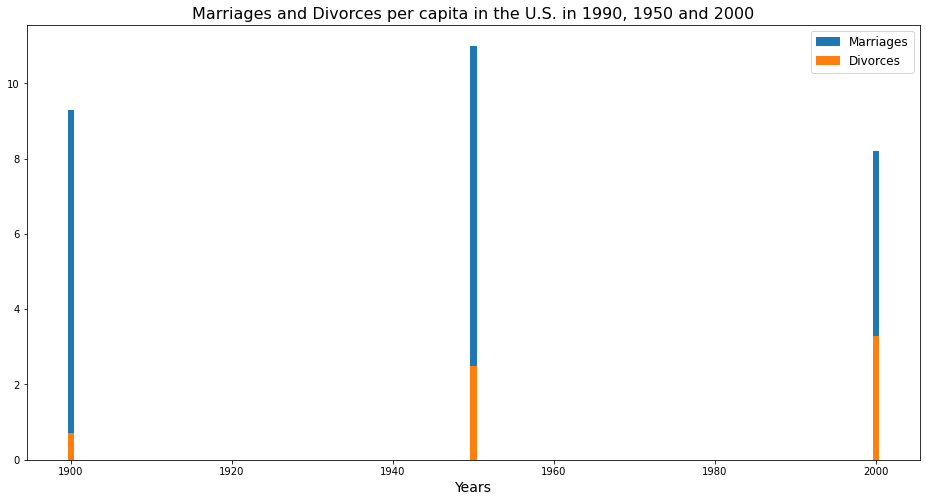

In [58]:
yrsData = yrsData[yrsData['Year'].apply(lambda x: x in [1900, 1950, 2000])]
years = yrsData['Year']
marriages = yrsData['Marriages_per_1000']
divorces = yrsData['Divorces_per_1000']
yrsData_plt = plt.figure(figsize= (16,8))
yrsData_plt = plt.bar(years, marriages, label ='Marriages')
yrsData_plt = plt.bar(years, divorces, label = 'Divorces')
yrsData_plt = plt.title("Marriages and Divorces per capita in the U.S. in 1990, 1950 and 2000", fontsize=16)
yrsData_plt = plt.xlabel("Years", fontsize=14)
yrsData_plt = plt.legend(fontsize = 12, loc = "upper right")
yrsData_plt

# Question 8

In [59]:
deadActors = pd.read_csv('actor_kill_counts.csv')
deadActors.sort_values(by="Count" , ascending=True, inplace=True)
deadActors

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


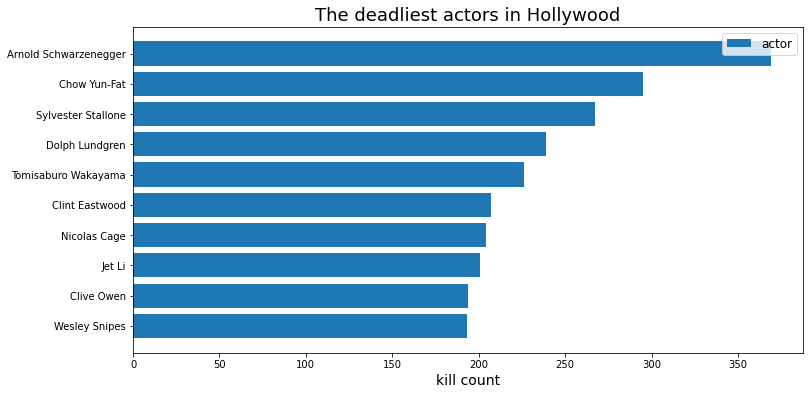

In [60]:
actors = deadActors['Actor']
killCount = deadActors['Count']
deadActorsPlt = plt.figure(figsize=(12,6))
deadActorsPlt = plt.barh(actors, killCount, label='actor')
#dead_actors = plt.barh(killCount, width=0.5, labe;='kill Count')
deadActorsPlt = plt.title("The deadliest actors in Hollywood", fontsize=18)
deadActorsPlt = plt.xlabel("kill count", fontsize=14)
deadActorsPlt = plt.legend(fontsize = 12, loc = "upper right")
deadActorsPlt

# Question 9

In [61]:
df = pd.read_csv("roman-emperor-reigns.csv")
df = df[df["Cause_of_Death"]=="Assassinated"]

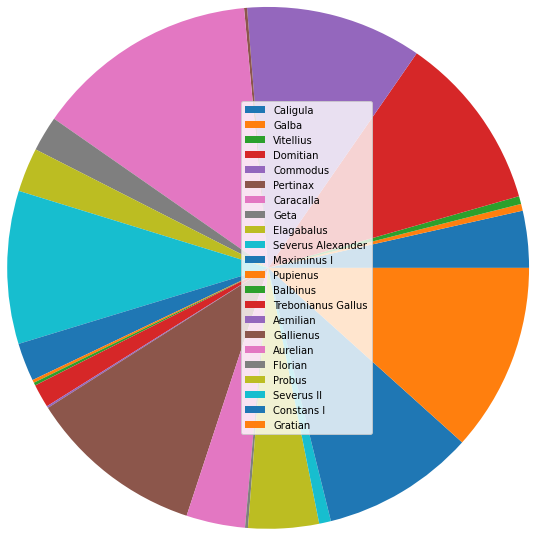

In [62]:
patches, texts = plt.pie(df.Length_of_Reign, radius=3, labeldistance = 2.5)
plt.legend(df.Emperor, loc = "right")
plt.show()

# Question 10

In [63]:
arcade = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
arcade.columns = ["Year", "Revenue", "Awards"]
arcade

,Year,Revenue,Awards
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<Figure size 1224x720 with 0 Axes>

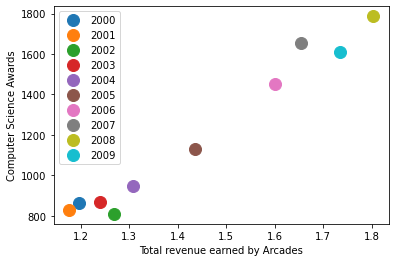

<Figure size 1224x720 with 0 Axes>

In [64]:
a = arcade.groupby('Year')
# print(a)
for name, group in a:
#     print(name)
#     print(group)
    plt.plot(group.Revenue, group.Awards, marker='o', linestyle='', markersize=12, label=name)
plt.legend()
plt.xlabel("Total revenue earned by Arcades")
plt.ylabel("Computer Science Awards")
plt.figure(figsize=(17,10))